The purpose of this notebook is to show how to **read and process** some research data using xarray library.

See xarray documentation here: (https://docs.xarray.dev/en/stable/index.html)


***
# Imports

In [1]:
# general libraties that exist on most systems

import os
import importlib

In [2]:
# The libraries that we will need in this notebook.
# If the required library doesn't exist, we install it via pip

required_packages   = {'numpy','xarray','ipympl','PIL','skimage'}

for rp in required_packages:
    try:
        print('Checking %s package'%rp)
        globals()[rp] = importlib.import_module(rp)
    except:
        print('Installing %s'%rp)
        !! pip install $rp
        globals()[rp] = importlib.import_module(rp)


import numpy as np
import xarray as xr
import skimage

Checking xarray package
Checking numpy package
Checking PIL package
Checking skimage package
Checking ipympl package


In [3]:
# Here we check if this notebook is running on Google Colab.
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [4]:
# If the notebbok is running on Google Colab, we mount google drive to instance
# and enable enable_custom_widget_manager for ipympl package to work properly.
# See See: https://matplotlib.org/ipympl/ for ipympl

if IN_COLAB:
    # mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    # Enable enable_custom_widget_manager
    from google.colab import output
    output.enable_custom_widget_manager()

In [5]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

***
# setting up the example data path

In [6]:
if IN_COLAB:
    os.chdir('/content/drive/MyDrive/pySULI/notebooks') # Here we assume, pySULI repo is uploaded to Google Drive

if not os.path.isdir('example_data'):
    print('example_data is not found here. Please make sure it is in the same directory as this notebook.')

In [7]:
# Assuming notebook and data folder are here.

here = os.getcwd()
example_data_path = 'example_data/file_types/image/'

os.chdir('%s/%s'%(here,example_data_path))
os.listdir()

['flower.jpg', 'NIST-LaB6.png', 'NIST-LaB6.tiff']

***
# reading a tiff image file as a numpy array and plotting without using xarray

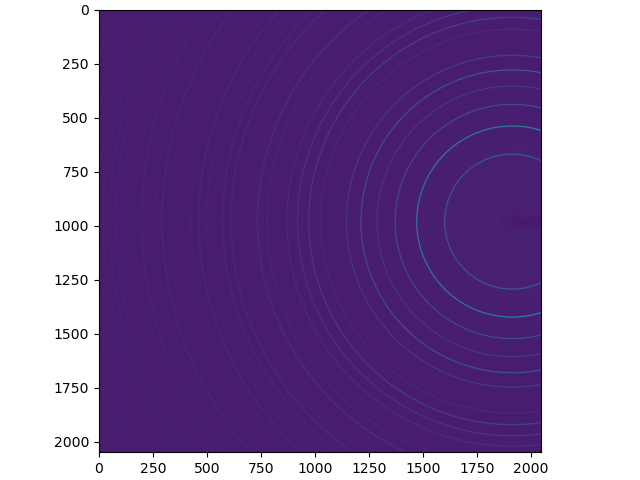

In [8]:
# first we need to read image as numpy array
img = np.array(PIL.Image.open('NIST-LaB6.tiff'))

# then plot using imshow
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
ax.set_aspect('equal')

This is an inefficient method for plotting; we will see how to do it with xarray instead.
***
# reading a tiff image file as xarray dataarray and plotting with xarray.

The general approach towards plotting using xarray is to treat the image as a 2d array; later, it will allow us to manipulate the image in a straightforward way.

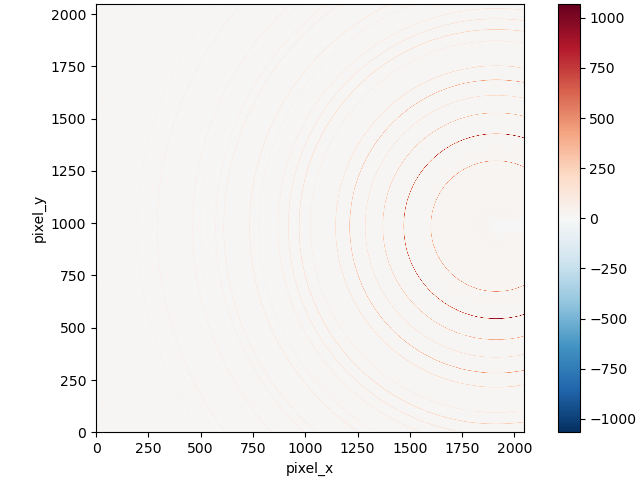

In [9]:
# first we need to read image as numpy array
img = np.array(PIL.Image.open('NIST-LaB6.tiff'))


# then we create an xarray DataArray object
da = xr.DataArray(data=img,
                  coords=[np.arange(img.shape[0]),np.arange(img.shape[1])],
                  dims=['pixel_y', 'pixel_x'])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
da.plot.imshow(ax=ax) # this line does the plotting for us and adds colorbar and figure axis labels.
ax.set_aspect('equal')

The coloring scale `robust` is a great visual aide for examining 2d intensity plots. To utilize it, in the `imshow()` method set `robust=True` as shown below.

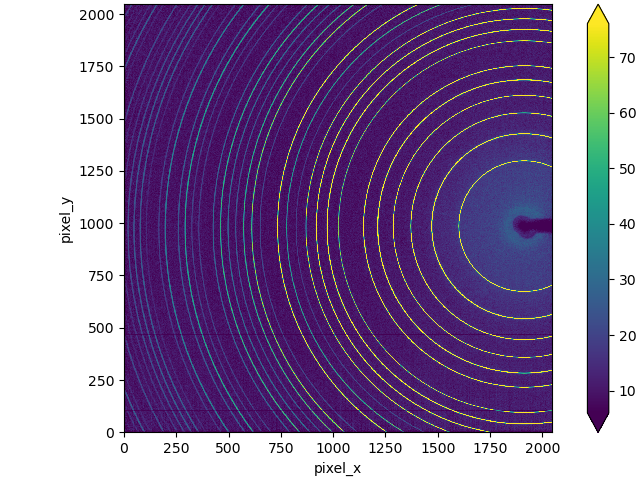

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
da.plot.imshow(ax=ax,robust=True)
ax.set_aspect('equal')

Change the colormap with the parameter `cmap`. `vmin` and `vmax` define the range of the colormap (which you can see in the bar on the right side of the plot).

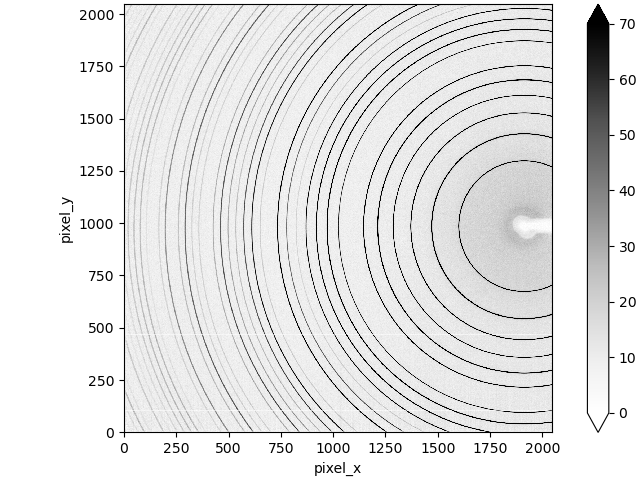

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
da.plot.imshow(ax=ax,robust=True,cmap = 'Greys', vmin=0, vmax=70)
ax.set_aspect('equal')

See below why we use xarray instead of matplotlib for making these kinds of plots:

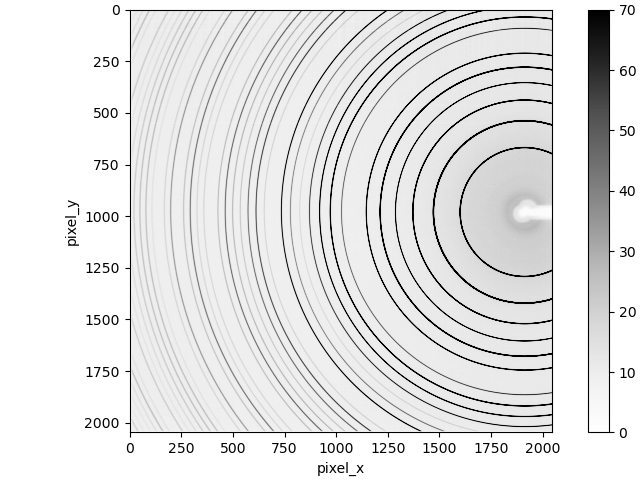

In [12]:
# in order to get above plot, we need to add some manual stuff

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(img,vmin=0,vmax=70,cmap='Greys') # we learned 70 here from xarray plot

# --- xarray plotting does these for us automatically
cb = fig.colorbar(im)
ax.set_xlabel('pixel_x')
ax.set_ylabel('pixel_y')
# ---------------------------------------------------

ax.set_aspect('equal')

>NOTE: There are some detector defects on the image.
For example, there are defective horizontal lines on pixel_x = 102 & pixel_y = 465 in the xarray plot above.
Unfortunately these lines are invisible in the plot.